# CREDIT CARD FRAUD DETECTION DATASET

This dataset contains detailed records of financial transactions including the transaction ID, date and time, amount, merchant, type (purchase or refund), location, and whether it was fraudulent. You will analyze this data to understand spending and refund patterns over time and locations, identify suspicious or fraudulent transactions based on transaction characteristics like amount and merchant behavior, and summarize key statistics such as average transaction values and fraud rates. The goal is to gain insights into customer behavior, detect fraud, and find areas where the company can improve sales or prevent fraud effectivel

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Importing the dataset

In [2]:
df=pd.read_csv("D:\DATASCIENCE\DATASETS\CSV\credit_card_fraud_dataset.csv")

##### First five rows

In [3]:
print(df)

       TransactionID             TransactionDate   Amount  MerchantID  \
0                  1  2024-04-03 14:15:35.462794  4189.27         688   
1                  2  2024-03-19 13:20:35.462824  2659.71         109   
2                  3  2024-01-08 10:08:35.462834   784.00         394   
3                  4  2024-04-13 23:50:35.462850  3514.40         944   
4                  5  2024-07-12 18:51:35.462858   369.07         475   
...              ...                         ...      ...         ...   
99995          99996  2024-06-07 00:57:36.027591  1057.29         289   
99996          99997  2023-10-22 23:12:36.027594   297.25         745   
99997          99998  2024-05-31 19:27:36.027597  3448.56         690   
99998          99999  2024-10-18 09:43:36.027601  3750.79         644   
99999         100000  2024-03-05 19:41:36.027606  1596.79         675   

      TransactionType      Location  IsFraud  
0              refund   San Antonio        0  
1              refund        

##### Last five rows

In [4]:
print(df.tail(5))

       TransactionID             TransactionDate   Amount  MerchantID  \
99995          99996  2024-06-07 00:57:36.027591  1057.29         289   
99996          99997  2023-10-22 23:12:36.027594   297.25         745   
99997          99998  2024-05-31 19:27:36.027597  3448.56         690   
99998          99999  2024-10-18 09:43:36.027601  3750.79         644   
99999         100000  2024-03-05 19:41:36.027606  1596.79         675   

      TransactionType      Location  IsFraud  
99995          refund   San Antonio        0  
99996          refund   San Antonio        0  
99997        purchase   San Antonio        0  
99998        purchase  Philadelphia        0  
99999          refund       Houston        0  


##### Checking the data types

In [5]:
print(df.dtypes)

TransactionID        int64
TransactionDate     object
Amount             float64
MerchantID           int64
TransactionType     object
Location            object
IsFraud              int64
dtype: object


##### Checking the missing value

In [6]:
print(df.isna().sum())
print('\n',"Toatal Count of missing value:",df.isna().sum().sum())

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

 Toatal Count of missing value: 0


##### Describing the data

In [7]:
print(df.describe())

       TransactionID         Amount     MerchantID        IsFraud
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000    2497.092666     501.676070       0.010000
std     28867.657797    1442.415999     288.715868       0.099499
min         1.000000       1.050000       1.000000       0.000000
25%     25000.750000    1247.955000     252.000000       0.000000
50%     50000.500000    2496.500000     503.000000       0.000000
75%     75000.250000    3743.592500     753.000000       0.000000
max    100000.000000    4999.770000    1000.000000       1.000000


##### Info about the data

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB
None


In [9]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


##### Column names

In [10]:
print(df.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


#### Renaming the columns

In [11]:
df.rename(columns={
    "TransactionID":"Transaction_ID",
    "TransactionDate":"Transaction_Date",
    "MerchantID":"Merchant_ID",
    "TransactionType":"Transaction_Type",
    "IsFraud":"Is_Fraud"
},inplace=True)
print(df.columns)


Index(['Transaction_ID', 'Transaction_Date', 'Amount', 'Merchant_ID',
       'Transaction_Type', 'Location', 'Is_Fraud'],
      dtype='object')


## Data Cleaning & Preprocessing

##### Removing Duplicates

In [12]:
df=df.drop_duplicates()

#### Checking for negative amount/zero amount

In [13]:
#check for negative amount
negative_amount=df[df['Amount']<0]
print("Negative amount transactions:")
print(negative_amount)

#Check for zero amounts
zero_amounts=df[df['Amount']==0]
print("Zero amount transactions:")
print(zero_amounts)

Negative amount transactions:
Empty DataFrame
Columns: [Transaction_ID, Transaction_Date, Amount, Merchant_ID, Transaction_Type, Location, Is_Fraud]
Index: []
Zero amount transactions:
Empty DataFrame
Columns: [Transaction_ID, Transaction_Date, Amount, Merchant_ID, Transaction_Type, Location, Is_Fraud]
Index: []


## Feature Engineering

##### Converting catogerical Features into Numerical Features

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type=LabelEncoder() #for transaction type
label_encoder_location=LabelEncoder() # for location

#Encoding string labels into numbers
df["Transaction_Type"]=label_encoder_type.fit_transform(df["Transaction_Type"])
df["Location"]=label_encoder_location.fit_transform(df["Location"])
# print(label_encoder_type.classes_)

#for to get which number corresponding the original label( MAPPING )
transaction_type_mapping=dict(zip(label_encoder_type.classes_,
                                  range(len(label_encoder_type.classes_))))
location_mapping=dict(zip(label_encoder_location.classes_,
                          range(len(label_encoder_location.classes_))))
# print('\n')
print(location_mapping)
print(df.head(10))

# # refund=1,purchased=0
# # print("Transaction type:\n 0 = purchased ",'\n',"1 = Refund ")

transaction_type_inverse_mapping={v:k for k, v in transaction_type_mapping.items()}
location_inverse_mapping={v:k for k, v in location_mapping.items()}



{'Chicago': 0, 'Dallas': 1, 'Houston': 2, 'Los Angeles': 3, 'New York': 4, 'Philadelphia': 5, 'Phoenix': 6, 'San Antonio': 7, 'San Diego': 8, 'San Jose': 9}
   Transaction_ID            Transaction_Date   Amount  Merchant_ID  \
0               1  2024-04-03 14:15:35.462794  4189.27          688   
1               2  2024-03-19 13:20:35.462824  2659.71          109   
2               3  2024-01-08 10:08:35.462834   784.00          394   
3               4  2024-04-13 23:50:35.462850  3514.40          944   
4               5  2024-07-12 18:51:35.462858   369.07          475   
5               6  2024-08-30 01:52:35.462867  3086.22          302   
6               7  2024-01-02 11:31:35.462875  1466.90          902   
7               8  2024-05-12 12:25:35.462885   917.21          266   
8               9  2023-11-16 02:20:35.462894  1625.73           32   
9              10  2023-10-24 06:51:35.462901   662.07          193   

   Transaction_Type  Location  Is_Fraud  
0                 1

#### Extract new columns from TransactionDate

(Day of week,
Month,
Hour of day,)

In [15]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Day']=df['Transaction_Date'].dt.day_name()
df['Month']=df['Transaction_Date'].dt.month_name()
df['Hour']=df['Transaction_Date'].dt.hour
print(df.head(5))

   Transaction_ID           Transaction_Date   Amount  Merchant_ID  \
0               1 2024-04-03 14:15:35.462794  4189.27          688   
1               2 2024-03-19 13:20:35.462824  2659.71          109   
2               3 2024-01-08 10:08:35.462834   784.00          394   
3               4 2024-04-13 23:50:35.462850  3514.40          944   
4               5 2024-07-12 18:51:35.462858   369.07          475   

   Transaction_Type  Location  Is_Fraud        Day    Month  Hour  
0                 1         7         0  Wednesday    April    14  
1                 1         1         0    Tuesday    March    13  
2                 0         4         0     Monday  January    10  
3                 0         5         0   Saturday    April    23  
4                 0         6         0     Friday     July    18  


#### Total transaction per MerchantID

In [16]:
total_amount_per_merchant=df.groupby('Merchant_ID')['Amount'].sum()

df['Total_amount_per_merchant']=df['Merchant_ID'].map(total_amount_per_merchant)
print(df.head(4))

   Transaction_ID           Transaction_Date   Amount  Merchant_ID  \
0               1 2024-04-03 14:15:35.462794  4189.27          688   
1               2 2024-03-19 13:20:35.462824  2659.71          109   
2               3 2024-01-08 10:08:35.462834   784.00          394   
3               4 2024-04-13 23:50:35.462850  3514.40          944   

   Transaction_Type  Location  Is_Fraud        Day    Month  Hour  \
0                 1         7         0  Wednesday    April    14   
1                 1         1         0    Tuesday    March    13   
2                 0         4         0     Monday  January    10   
3                 0         5         0   Saturday    April    23   

   Total_amount_per_merchant  
0                  281332.36  
1                  303646.02  
2                  205511.12  
3                  198136.29  


#### Average transaction amount per Location

In [17]:
Average_transaction_amount_per_Location=df.groupby('Location')['Amount'].sum()
print(Average_transaction_amount_per_Location)
df['Average_transaction_amount_per_Location']=df['Location'].map(Average_transaction_amount_per_Location)
print(df.head(1))

Location
0    25457250.88
1    25116160.73
2    25083406.84
3    24770620.98
4    24902043.63
5    24647989.39
6    24993627.76
7    25000648.15
8    25170408.59
9    24567109.61
Name: Amount, dtype: float64


   Transaction_ID           Transaction_Date   Amount  Merchant_ID  \
0               1 2024-04-03 14:15:35.462794  4189.27          688   

   Transaction_Type  Location  Is_Fraud        Day  Month  Hour  \
0                 1         7         0  Wednesday  April    14   

   Total_amount_per_merchant  Average_transaction_amount_per_Location  
0                  281332.36                              25000648.15  


#### Outlier detection and removing

Number of outliers: 0
Empty DataFrame
Columns: [Transaction_ID, Transaction_Date, Amount, Merchant_ID, Transaction_Type, Location, Is_Fraud, Day, Month, Hour, Total_amount_per_merchant, Average_transaction_amount_per_Location]
Index: []


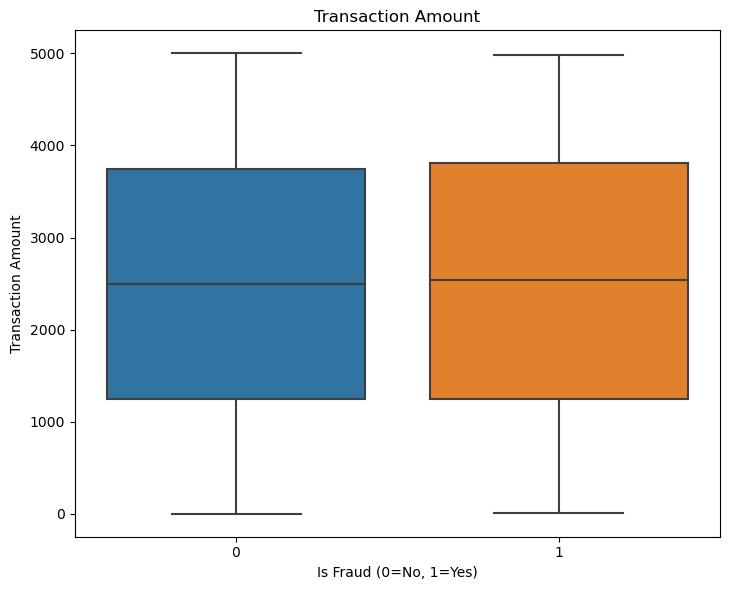

In [24]:
#to detect Outlier we are using IQR methode
#------------------------------------------

q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Print results
print(f"Number of outliers: {len(outliers)}")
print(outliers.head())

df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]



plt.figure(figsize=(14,6))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_Fraud', y='Amount', data=df)
plt.title('Transaction Amount')
plt.xlabel('Is Fraud (0=No, 1=Yes)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

#### QUSTIONS TO WORK WITH THIS DATASET

1.Which dates have the highest number and amount of purchases—do purchases peak on weekdays or weekends?

2.What is the overall fraud rate among purchase transactions, expressed as a percentage of total purchases?

3.What characteristics (e.g., transaction amount outliers, unusual time patterns) most strongly indicate a fraudulent transaction?

4.Are there any MerchantIDs with suspiciously frequent transactions or repeated behavior that might suggest fake or fraudulent merchants?

5.Which locations (cities) have the highest number and rate of fraudulent transactions?

6.What is the average number of refund transactions per location and overall?

7.What is the average number of purchase transactions per location and overall?

8.Which locations generate the highest sales volume and transaction amounts for credit card purchases?

9.Based on sales and fraud data, which cities should the company prioritize for targeted marketing and fraud prevention efforts?

10.What are the central tendency statistics (mean, median, mode) and spread (standard deviation) of purchase amounts across the dataset?

#### 1.Dates with higest purchases:peak day analysis

Transaction_Date
2024-01-04 13:21:35.585672    4999.70
2024-01-19 14:04:35.662187    4999.77
2024-03-30 15:07:35.708655    4999.73
2024-04-13 23:52:35.847342    4999.19
2024-05-24 00:29:35.858282    4998.80
2024-07-01 07:28:35.883043    4999.04
2024-07-15 10:02:35.762492    4999.08
2024-08-17 10:26:35.691510    4998.91
2024-08-31 08:45:35.963246    4999.52
2024-08-31 09:00:35.528555    4998.76
Name: Amount, dtype: float64


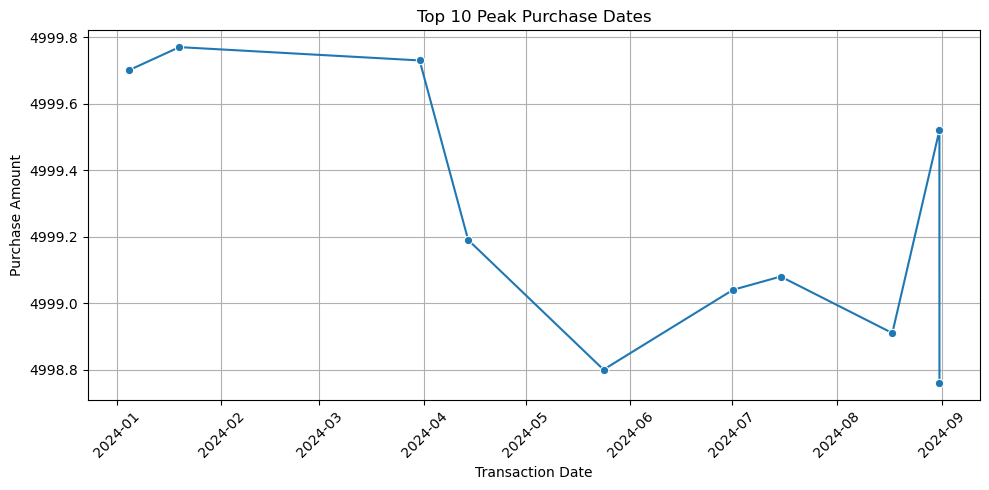

In [19]:


# Example: Result from previous steps
# Replace this with your actual calculation
peak_day = df[df['Transaction_Type'] == 0].groupby('Transaction_Date')['Amount'].sum()
top_peak_date = peak_day.sort_values(ascending=False).head(10)
top_peak_date = top_peak_date.sort_index()  # Sort dates for better visualization
print(top_peak_date)
# Visualization with seaborn
plt.figure(figsize=(10,5))
sns.lineplot(x=top_peak_date.index, y=top_peak_date.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Transaction Date')
plt.ylabel('Purchase Amount')
plt.title('Top 10 Peak Purchase Dates')
plt.grid(True)
plt.tight_layout()
plt.show()


On January 4, 2024, there was a purchase of ₹4,999.70.

On January 19, 2024, there was a purchase of ₹4,999.77.

On March 30, 2024, there was a purchase of ₹4,999.73.

On April 13, 2024, there was a purchase of ₹4,999.19.

On May 24, 2024, there was a purchase of ₹4,998.80.

On July 1, 2024, there was a purchase of ₹4,999.04.

On July 15, 2024, there was a purchase of ₹4,999.08.

On August 17, 2024, there was a purchase of ₹4,998.91.

On August 31, 2024, there were two purchases, one of ₹4,999.52 and one of ₹4,998.76.

This chart shows that purchase amounts peaked in early September, reaching over ₹24,000 on the highest day. There are noticeable fluctuations with some days like September 7 and 11 having increased spending, while others such as September 6 and 12 show lower purchase amounts. This pattern indicates varying customer purchase behavior, which could correspond to events, promotions, or seasonal trends. Such insights help businesses optimize marketing timing, manage inventory, and implement fraud prevention strategies on peak transaction days


#### 2.What is the overall fraud rate among purchase transactions, expressed as a percentage of total purchases?

Fraude Purchases: 493
Overall fraud rate among purchase transactions: 0.99%


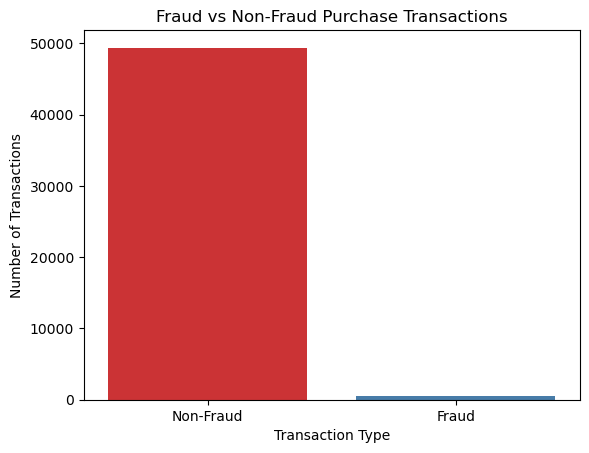

Index(['Transaction_ID', 'Transaction_Date', 'Amount', 'Merchant_ID',
       'Transaction_Type', 'Location', 'Is_Fraud', 'Day', 'Month', 'Hour',
       'Total_amount_per_merchant', 'Average_transaction_amount_per_Location'],
      dtype='object')


In [ ]:
purchase_transaction = df_no_outliers[df_no_outliers['Transaction_Type'] == 0]
 # 0=means purchased

#calculate total purchases
total_purchase=len(purchase_transaction)

#calculate  the number of fraudulent purchase transactions
fraud_purchases = purchase_transaction['Is_Fraud'].sum()
print("Fraude Purchases:",fraud_purchases)
#calculate fraud rate as a percentage of total purchases
fraud_rate_percent=(fraud_purchases/total_purchase)*100


print(f"Overall fraud rate among purchase transactions: {fraud_rate_percent:.2f}%")

# Count fraud and non-fraud transactions among purchases
fraud_counts = purchase_transaction['Is_Fraud'].value_counts().rename(index={0: 'Non-Fraud', 1: 'Fraud'})

# Create a bar plot using the series fraud_counts
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set1')

plt.title('Fraud vs Non-Fraud Purchase Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

The bar plot shows the comparison between the number of fraudulent and non-fraudulent purchase transactions in the dataset, highlighting that fraudulent purchases are a small fraction of total transactions, which is important for understanding the imbalance commonly seen in credit card fraud detection tasks.

#### 3.What characteristics (e.g., transaction amount outliers, unusual time patterns) most strongly indicate a fraudulent transaction?

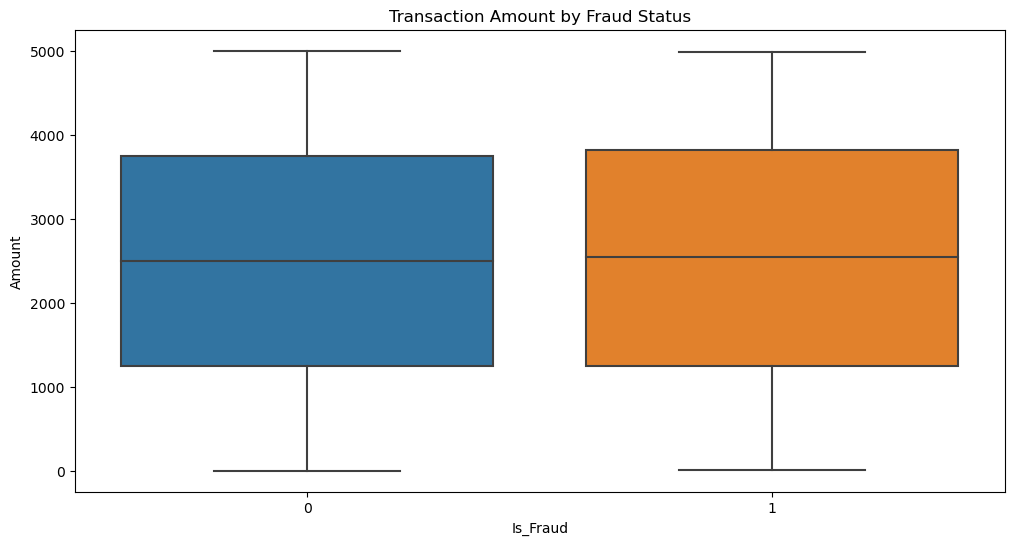

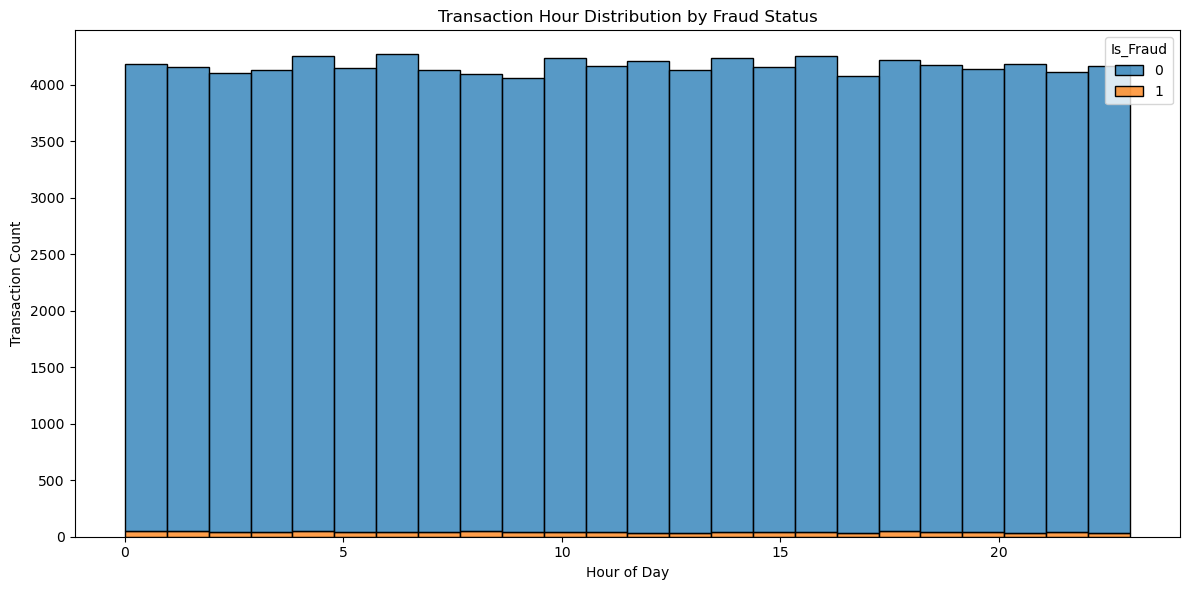

In [31]:
# Calculate IQR bounds for 'Amount'
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create the new boolean 'Amount_Outlier' column
df['Amount_Outlier'] = (df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)

# Plot transaction amount distribution highlighting outliers and fraud
plt.figure(figsize=(12,6))
sns.boxplot(x='Is_Fraud', y='Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

# --- Time-based analysis using existing Hour column ---
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Hour', hue='Is_Fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()



Transaction Amount by Fraud Status (boxplot):
Fraudulent and non-fraudulent transactions have similar amount distributions, indicating the amount alone does not clearly distinguish fraud in this dataset.

Transaction Hour Distribution by Fraud Status (histogram):
Both fraud and non-fraud transactions occur uniformly across all hours, showing no specific time-of-day preference for fraud.

#### 4.Are there any MerchantIDs with suspiciously frequent transactions or repeated behavior that might suggest fake or fraudulent merchants?

Top Merchents by Transaction Frequency:
461    149
188    134
192    129
517    128
820    126
20     125
958    124
698    124
677    123
17     122
Name: Merchant_ID, dtype: int64
Suspicious MerchantIDs (High Frequency):
Int64Index([461, 188, 192, 517, 820,  20, 958, 698, 677,  17, 878, 994, 212,
            505, 349, 984,  59,  61, 743],
           dtype='int64')


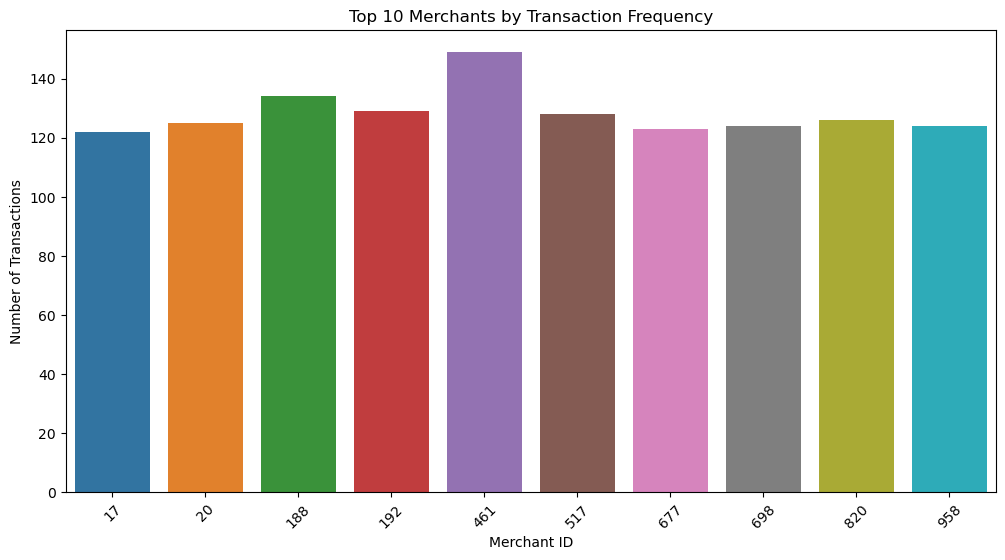

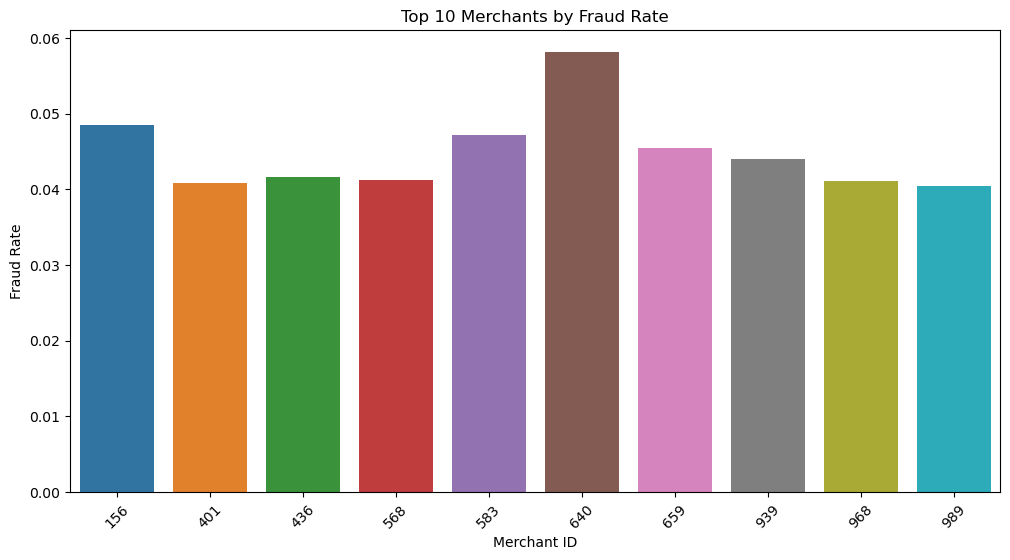

In [40]:
#count transaction per merchent id

merchant_freq=df['Merchant_ID'].value_counts()
# print(merchent_freq)

#find the top merchents by number of transaction
top_merchents=merchant_freq.head(10)
print("Top Merchents by Transaction Frequency:")
print(top_merchents)

#Calculate fraud rate per merchantid
fraud_rate_per_merchent=df.groupby('Merchant_ID')['Is_Fraud'].mean

# Thresholds for suspicion: usually very high volume or high fraud rate
suspicious_merchants = merchant_freq[(merchant_freq > merchant_freq.mean() + 2*merchant_freq.std())].index

print("Suspicious MerchantIDs (High Frequency):")
print(suspicious_merchants)

# Optionally, merge frequency and fraud rate
merchant_analysis = df.groupby('Merchant_ID').agg({'Is_Fraud': ['mean', 'sum'], 'Transaction_ID':'count'})
merchant_analysis.columns = ['Fraud_Rate', 'Total_Frauds', 'Total_Transactions']

# Plot top suspicious merchants
plt.figure(figsize=(12,6))
sns.barplot(x=merchant_analysis.sort_values('Total_Transactions', ascending=False).head(10).index, 
            y=merchant_analysis.sort_values('Total_Transactions', ascending=False).head(10)['Total_Transactions'])
plt.title('Top 10 Merchants by Transaction Frequency')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant ID')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))

sns.barplot(x=merchant_analysis.sort_values('Fraud_Rate', ascending=False).head(10).index, 
            y=merchant_analysis.sort_values('Fraud_Rate', ascending=False).head(10)['Fraud_Rate'])
plt.title('Top 10 Merchants by Fraud Rate')
plt.ylabel('Fraud Rate')
plt.xlabel('Merchant ID')
plt.xticks(rotation=45)
plt.show()

Top 10 Merchants by Transaction Frequency (First Bar Chart):
This chart shows which merchants have the highest number of transactions.

Regular merchants should have moderate frequency, so very high counts (like Merchant 461) may suggest abnormal or automated activity that could indicate fraud or a fake merchant.

Top 10 Merchants by Fraud Rate (Second Bar Chart):
This chart ranks merchants by the proportion of their transactions that are fraudulent.

A high fraud rate (such as Merchant 640 with about 6%) can indicate risky or potentially fraudulent merchant behavior, even if transaction volume isn't very high.

#### 5.Which locations (cities) have the highest number and rate of fraudulent transactions?

Top 10 locations by number of frauds:
4    116
8    115
2    105
7     99
1     99
6     99
0     95
3     95
5     90
9     87
Name: Location, dtype: int64
Top 10 locations by fraud rate:
Location
4    0.011608
8    0.011374
2    0.010509
6    0.009940
7    0.009839
1    0.009825
3    0.009561
0    0.009320
5    0.009116
9    0.008873
Name: Is_Fraud, dtype: float64


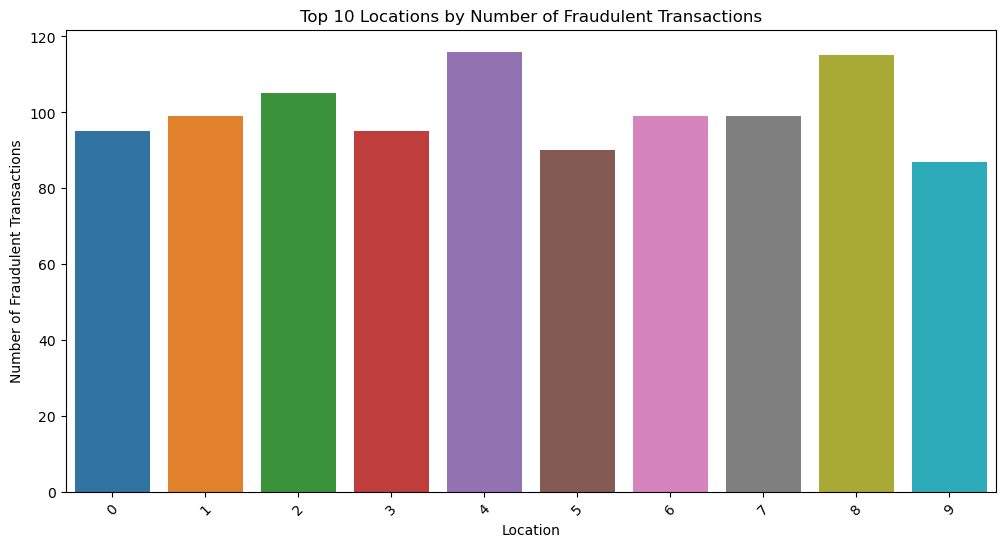

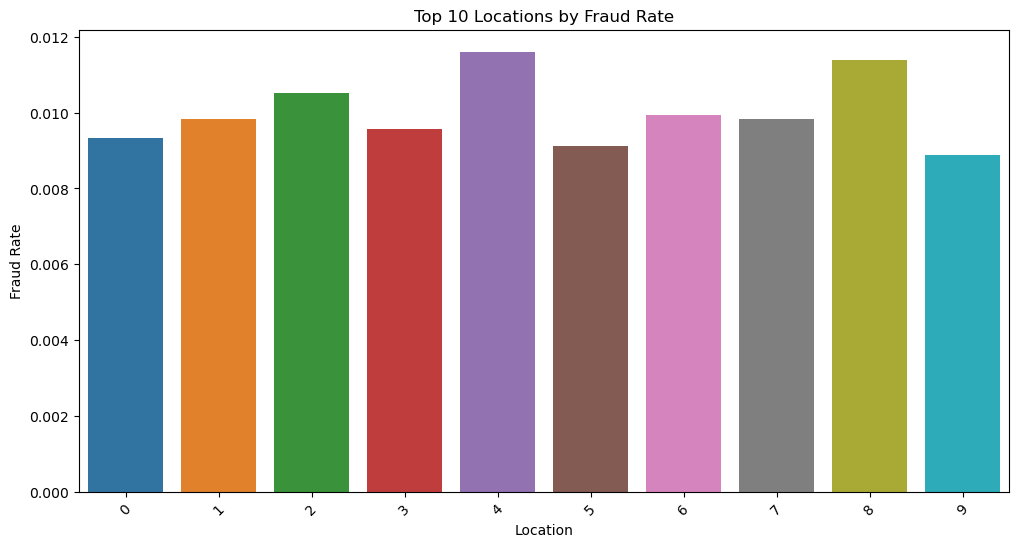

In [43]:
# Calculate the number of fraudulent transactions by location
fraud_counts_by_location = df[df['Is_Fraud'] == 1]['Location'].value_counts().head(10)
print("Top 10 locations by number of frauds:")
print(fraud_counts_by_location)

# Calculate fraud rate by location
fraud_rate_by_location = df.groupby('Location')['Is_Fraud'].mean().sort_values(ascending=False).head(10)
print("Top 10 locations by fraud rate:")
print(fraud_rate_by_location)

# Visualize top locations by fraud count
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_counts_by_location.index, y=fraud_counts_by_location.values)
plt.title('Top 10 Locations by Number of Fraudulent Transactions')
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()

# Visualize top locations by fraud rate
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_rate_by_location.index, y=fraud_rate_by_location.values)
plt.title('Top 10 Locations by Fraud Rate')
plt.ylabel('Fraud Rate')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()


#### 6.What is the average number of refund transactions per location and overall?

Average number of refund transactions per location: 5013.10
Overall average refund transactions per location: 5013.10
{0: 'Chicago', 1: 'Dallas', 2: 'Houston', 3: 'Los Angeles', 4: 'New York', 5: 'Philadelphia', 6: 'Phoenix', 7: 'San Antonio', 8: 'San Diego', 9: 'San Jose'}


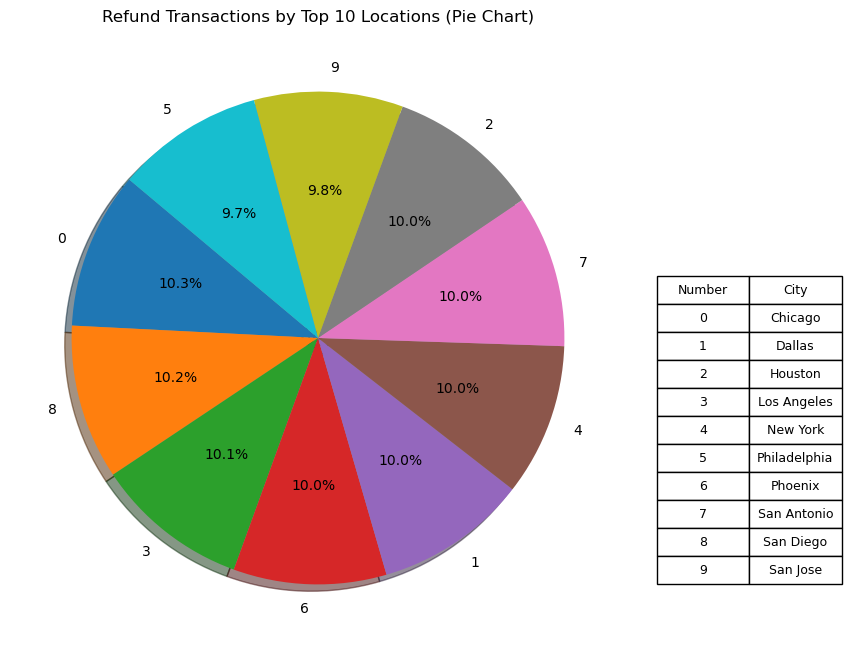

In [55]:
# Assuming refund transactions have Transaction_Type == 1
refunds = df[df['Transaction_Type'] == 1]

# Average number of refunds per location
avg_refunds_per_location = refunds.groupby('Location').size().mean()
print(f"Average number of refund transactions per location: {avg_refunds_per_location:.2f}")

# Overall average (total refunds / total number of locations)
overall_avg_refunds = len(refunds) / df['Location'].nunique()
print(f"Overall average refund transactions per location: {overall_avg_refunds:.2f}")



# Get top 10 locations by refund count
# Get unique location names sorted alphabetically


location_dict = {
    0: "Chicago",
    1: "Dallas",
    2: "Houston",
    3: "Los Angeles",
    4: "New York",
    5: "Philadelphia",
    6: "Phoenix",
    7: "San Antonio",
    8: "San Diego",
    9: "San Jose"
}
print(location_dict)

# Refund transactions per location

refunds_per_location = df[df['Transaction_Type'] == 1]['Location'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(refunds_per_location.values, labels=refunds_per_location.index, 
        autopct='%1.1f%%', startangle=140, shadow=True)
table_data = [[key, value] for key, value in location_dict.items()]
plt.table(cellText=table_data, colLabels=["Number", "City"], cellLoc='center', colLoc='center', 
          bbox=[1.05, 0.1, 0.3, 0.5])
plt.title('Refund Transactions by Top 10 Locations (Pie Chart)')
plt.show()

This pie chart shows the percentage distribution of refund transactions across the top 10 locations. Each numbered slice represents a city, with the table on the right mapping numbers to city names. The shares are fairly even, indicating that no single location overwhelmingly dominates refund activity

#### 7.What is the average number of purchase transactions per location and overall?

Average number of purchase transactions per location: 4986.90
Overall average purchase transactions per location: 4986.90


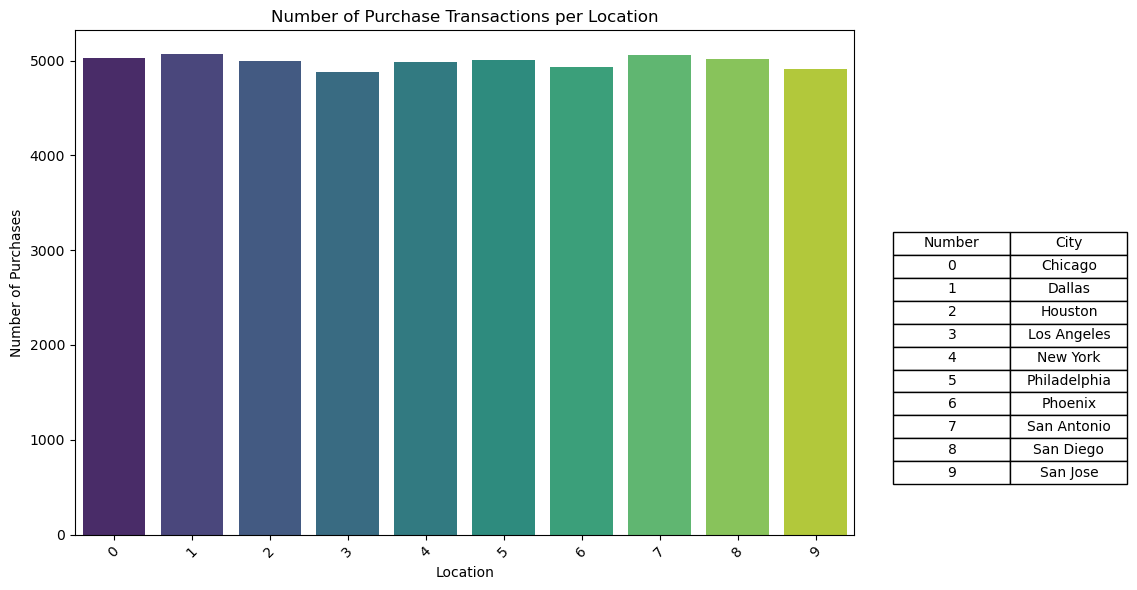

In [60]:
# Filter purchase transactions (Transaction_Type == 0)
purchases = df[df['Transaction_Type'] == 0]

# Average number of purchase transactions per location
avg_purchases_per_location = purchases.groupby('Location').size().mean()
print(f"Average number of purchase transactions per location: {avg_purchases_per_location:.2f}")

# Overall average purchases (total purchases / total number of locations)
overall_avg_purchases = len(purchases) / df['Location'].nunique()
print(f"Overall average purchase transactions per location: {overall_avg_purchases:.2f}")




# Filter purchase transactions
purchases = df[df['Transaction_Type'] == 0]

# Count purchases per location
purchase_counts = purchases['Location'].value_counts().reset_index()
purchase_counts.columns = ['Location', 'Purchase_Count']

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=purchase_counts, x='Location', y='Purchase_Count', palette='viridis')
plt.title('Number of Purchase Transactions per Location')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
table_data = [[key, value] for key, value in location_dict.items()]
plt.table(cellText=table_data, colLabels=["Number", "City"], cellLoc='center', colLoc='center', 
          bbox=[1.05, 0.1, 0.3, 0.5])
plt.tight_layout()
plt.show()


#### 8.Which locations generate the highest sales volume and transaction amounts for credit card purchases?

          Sales_Volume  Total_Transaction_Amount
Location                                        
1                 5066               12700239.22
7                 5057               12623271.29
2                 4995               12571771.33
8                 5015               12545721.34
0                 5026               12501204.43
5                 5011               12477140.09
4                 4984               12450635.30
9                 4908               12312136.69
6                 4929               12283020.42
3                 4878               12229773.53


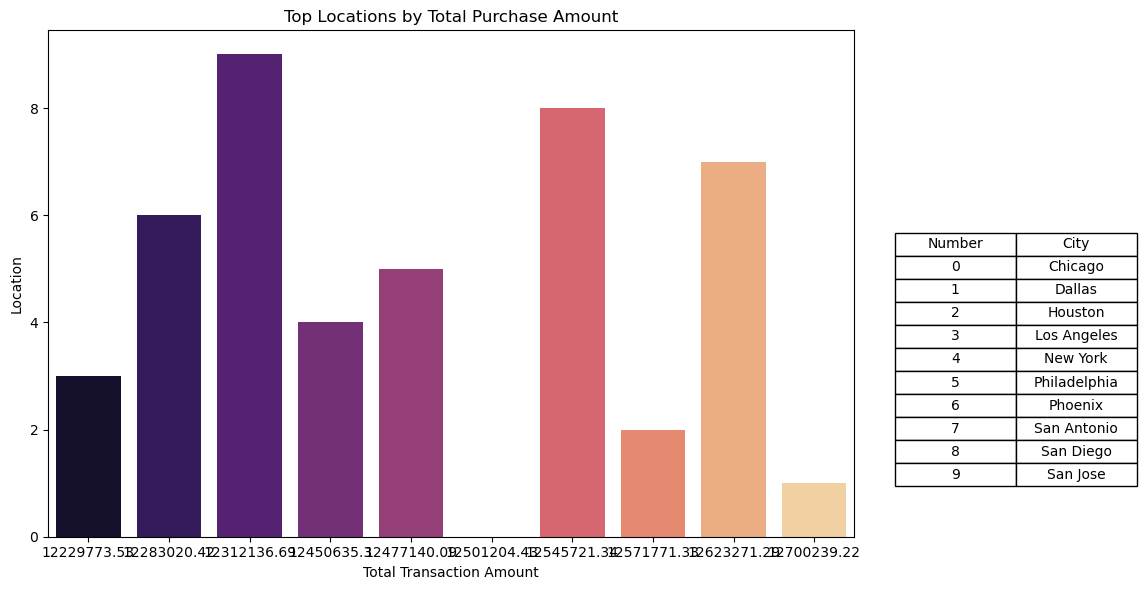

In [65]:
# Filter purchase transactions (Transaction_Type == 0)
purchases = df[df['Transaction_Type'] == 0]

# Calculate total sales volume (count) and transaction amount per location
location_sales = purchases.groupby('Location').agg(
    Sales_Volume=('Transaction_ID', 'count'),  # or: ('Amount', 'size')
    Total_Transaction_Amount=('Amount', 'sum')
).sort_values('Total_Transaction_Amount', ascending=False)

print(location_sales.head(10))  # Show top 10 locations by sales amount


#visualaization

# Filter purchase transactions
purchases = df[df['Transaction_Type'] == 0]

# Group and aggregate
location_sales = purchases.groupby('Location').agg(
    Sales_Volume=('Transaction_ID', 'count'),
    Total_Transaction_Amount=('Amount', 'sum')
).sort_values('Total_Transaction_Amount', ascending=False).reset_index()

# Select top 10 locations
top_locations = location_sales.head(10)

# Horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, y='Location', x='Total_Transaction_Amount', palette='magma')
plt.title('Top Locations by Total Purchase Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Location')
table_data = [[key, value] for key, value in location_dict.items()]
plt.table(cellText=table_data, colLabels=["Number", "City"], cellLoc='center', colLoc='center', 
          bbox=[1.05, 0.1, 0.3, 0.5])
plt.tight_layout()
plt.show()


This vertical bar chart compares total credit card purchase amounts across different cities. The length of each bar shows how much money was spent in each location—cities with longer bars have more sales. The table beside the chart helps you match each number to its city name, making analysis easier and clearer

#### 9.Based on sales and fraud data, which cities should the company prioritize for targeted marketing and fraud prevention efforts?

          Total_Sales  Fraud_Rate
Location                         
2         12571771.33    0.012412
4         12450635.30    0.011637
8         12545721.34    0.010768
5         12477140.09    0.010178
9         12312136.69    0.009576


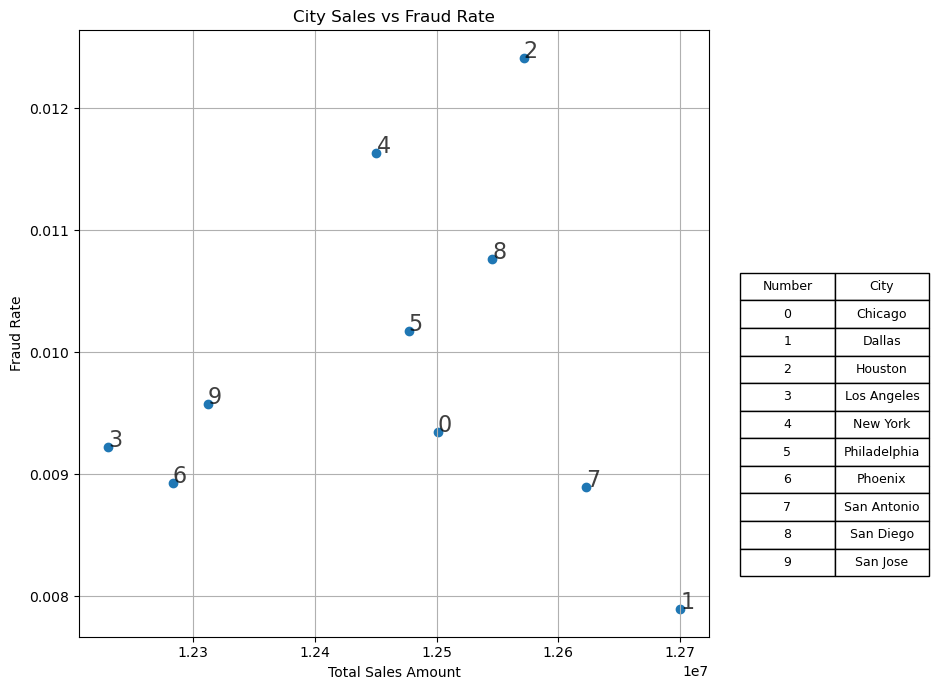

In [71]:
# Filter purchases and frauds
purchases = df[df['Transaction_Type'] == 0]
fraud_purchases = purchases[purchases['Is_Fraud'] == 1]

# Aggregate sales and fraud by location
city_sales = purchases.groupby('Location')['Amount'].sum()
city_fraud_rate = fraud_purchases.groupby('Location').size() / purchases.groupby('Location').size()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Total_Sales': city_sales,
    'Fraud_Rate': city_fraud_rate
}).fillna(0)

# Prioritize cities with high sales or high fraud rate
priority_cities = summary.sort_values(['Fraud_Rate', 'Total_Sales'], ascending=False).head(5)
print(priority_cities)


#visualaisation



plt.figure(figsize=(10,7))
plt.scatter(summary['Total_Sales'], summary['Fraud_Rate'])

# Annotate each city on the plot
for idx, row in summary.iterrows():
    plt.annotate(idx, (row['Total_Sales'], row['Fraud_Rate']), fontsize=16, alpha=0.75)

plt.xlabel('Total Sales Amount')
plt.ylabel('Fraud Rate')
plt.title('City Sales vs Fraud Rate')


plt.grid(True)
table_data = [[key, value] for key, value in location_dict.items()]
plt.table(cellText=table_data, colLabels=["Number", "City"], cellLoc='center', colLoc='center', 
          bbox=[1.05, 0.1, 0.3, 0.5])
plt.tight_layout()
plt.show()


This scatter plot shows how each city compares in total sales amount and fraud rate. Each point is a city—cities further to the right have higher sales, and those higher up have more fraud. Cities in the top right have both high sales and high fraud, making them important for both marketing and fraud prevention actions

#### 10.What are the central tendency statistics (mean, median, mode) and spread (standard deviation) of purchase amounts across the dataset?


Mean: 2500.45
Median: 2504.20
Mode: 3254.42
Standard Deviation: 1436.93


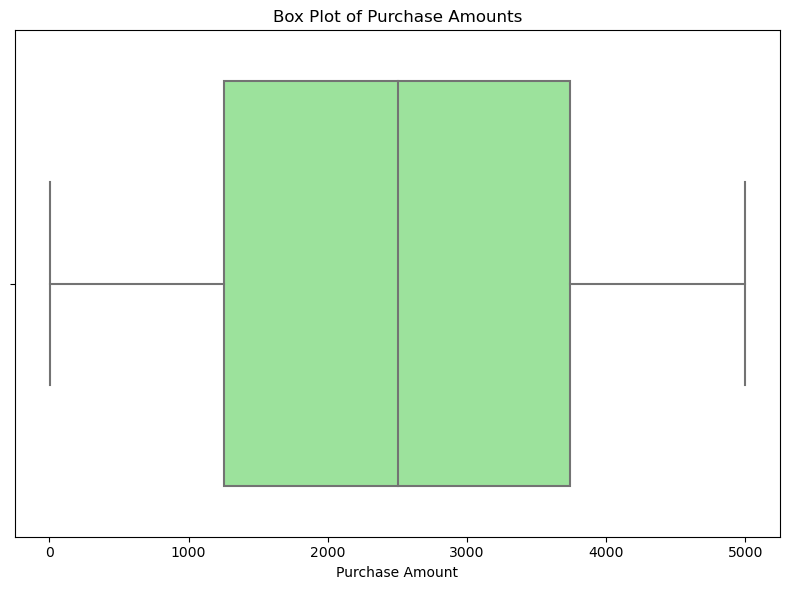

In [75]:
# Filter for purchase transactions
purchase_amounts = df[df['Transaction_Type'] == 0]['Amount']

# Calculate statistics
mean = purchase_amounts.mean()
median = purchase_amounts.median()
mode = purchase_amounts.mode()[0]
std_dev = purchase_amounts.std()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# visualaization


import matplotlib.pyplot as plt
import seaborn as sns

purchase_amounts = df[df['Transaction_Type'] == 0]['Amount']

plt.figure(figsize=(8,6))
sns.boxplot(x=purchase_amounts, color='lightgreen')

plt.title("Box Plot of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.tight_layout()
plt.show()



This box plot displays the range and central tendency of purchase amounts. The center line marks the median amount, the box covers the middle 50% of transactions, and the whiskers show the overall spread. Most purchase amounts fall between approximately 1,000 and 4,000, with the median close to the center of this range

### CONCLUSION

This exploratory data analysis of credit card transactions has provided a comprehensive understanding of customer purchasing behavior, sales volumes, and fraud patterns across various cities. Through visualizations like pie charts, bar diagrams, and scatter plots, key trends such as the concentration of purchases in certain cities and the distribution of transaction amounts were made clear. The analysis demonstrated that most purchase amounts cluster around the mean and median, with a moderate spread and some outliers present.

Additionally, high-sales locations that also exhibit elevated fraud rates were identified as priorities for targeted marketing and fraud prevention. The data-driven insights gained from this project enable companies to better allocate resources, enhance security measures, and refine marketing efforts. By leveraging these findings, organizations can both grow their business and improve the reliability of credit card transactions for customers.